# 02 - Advanced Plot Types

## Introduction

Beyond basic plots, Matplotlib offers many specialized plot types that are essential for data analysis and data engineering. These plots help you understand distributions, relationships, and patterns in your data.

## What You'll Learn

- Box plots for understanding distributions and outliers
- Violin plots for detailed distribution visualization
- Heatmaps for correlation matrices and 2D data
- Pie charts for categorical proportions
- Area plots for cumulative data
- Stacked bar charts for multi-category comparisons


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set style for better-looking plots
plt.style.use('default')


## Box Plot

**Box plots** (also called box-and-whisker plots) are excellent for:
- Understanding data distribution
- Identifying outliers
- Comparing distributions across categories
- Showing quartiles (Q1, median, Q3)

**Why Box Plots for Data Engineering?**
- **Data quality checks**: Quickly identify outliers and anomalies
- **Distribution analysis**: Understand how data is spread
- **Comparison**: Compare distributions across different groups
- **ETL validation**: Check data quality before and after transformations


/var/folders/qs/gl7f55l16vn33l0848mpksch0000gp/T/ipykernel_25341/1771823348.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2, data3], labels=['Group A', 'Group B', 'Group C'])


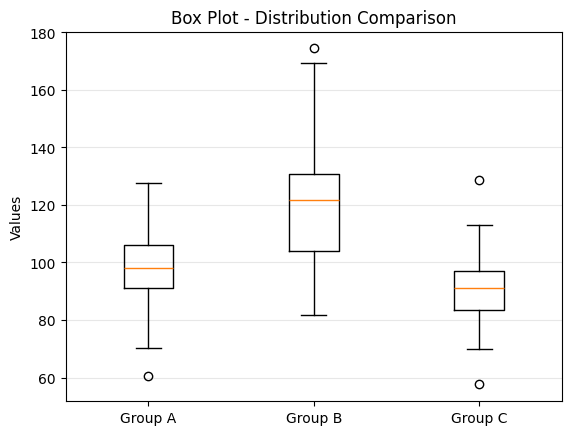

In [2]:
# Create sample data with different distributions
np.random.seed(42)
data1 = np.random.normal(100, 15, 100)
data2 = np.random.normal(120, 20, 100)
data3 = np.random.normal(90, 10, 100)

# Create box plot
plt.boxplot([data1, data2, data3], labels=['Group A', 'Group B', 'Group C'])
plt.ylabel('Values')
plt.title('Box Plot - Distribution Comparison')
plt.grid(True, axis='y', alpha=0.3)
plt.show()


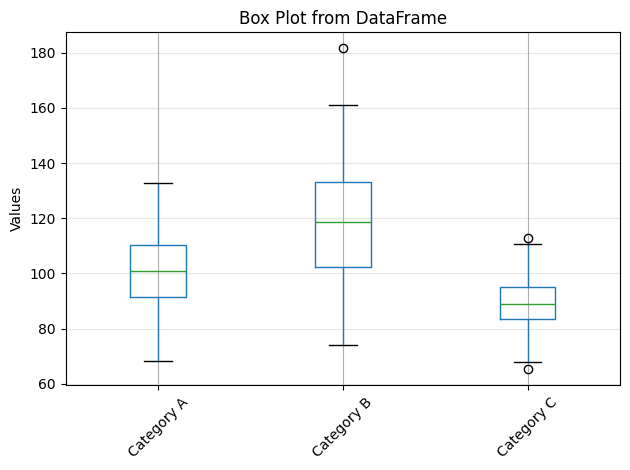

In [3]:
# Box plot from DataFrame
df = pd.DataFrame({
    'Category A': np.random.normal(100, 15, 100),
    'Category B': np.random.normal(120, 20, 100),
    'Category C': np.random.normal(90, 10, 100)
})

# Using pandas plot method
df.boxplot()
plt.ylabel('Values')
plt.title('Box Plot from DataFrame')
plt.xticks(rotation=45)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Violin Plot

**Violin plots** combine a box plot with a kernel density estimate. They show:
- The distribution shape (like a histogram)
- Summary statistics (like a box plot)
- More detail than box plots alone

**Why Violin Plots?**
- Better understanding of data distribution shape
- See if data is bimodal, skewed, or normal
- More informative than box plots for complex distributions


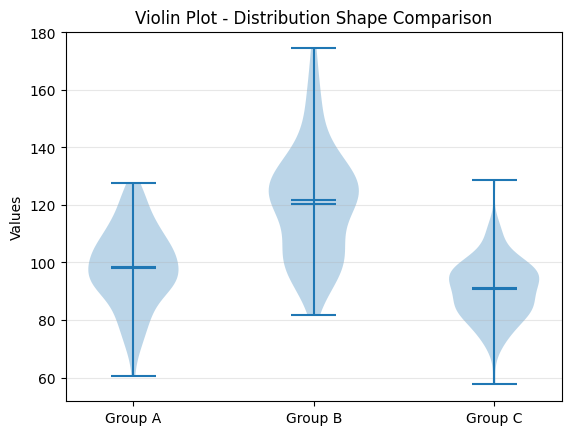

In [4]:
# Note: Violin plots require matplotlib 3.0+ or you can use seaborn
# For this example, we'll use matplotlib's violinplot

np.random.seed(42)
data1 = np.random.normal(100, 15, 100)
data2 = np.random.normal(120, 20, 100)
data3 = np.random.normal(90, 10, 100)

# Create violin plot
parts = plt.violinplot([data1, data2, data3], positions=[1, 2, 3], 
                       showmeans=True, showmedians=True)
plt.xticks([1, 2, 3], ['Group A', 'Group B', 'Group C'])
plt.ylabel('Values')
plt.title('Violin Plot - Distribution Shape Comparison')
plt.grid(True, axis='y', alpha=0.3)
plt.show()


## Heatmap

**Heatmaps** are perfect for visualizing:
- Correlation matrices
- 2D data arrays
- Confusion matrices
- Any matrix-like data

**Why Heatmaps for Data Engineering?**
- **Correlation analysis**: Understand relationships between variables
- **Data quality**: Visualize missing data patterns
- **Performance metrics**: Show pipeline performance across dimensions
- **Feature relationships**: Identify correlated features before modeling


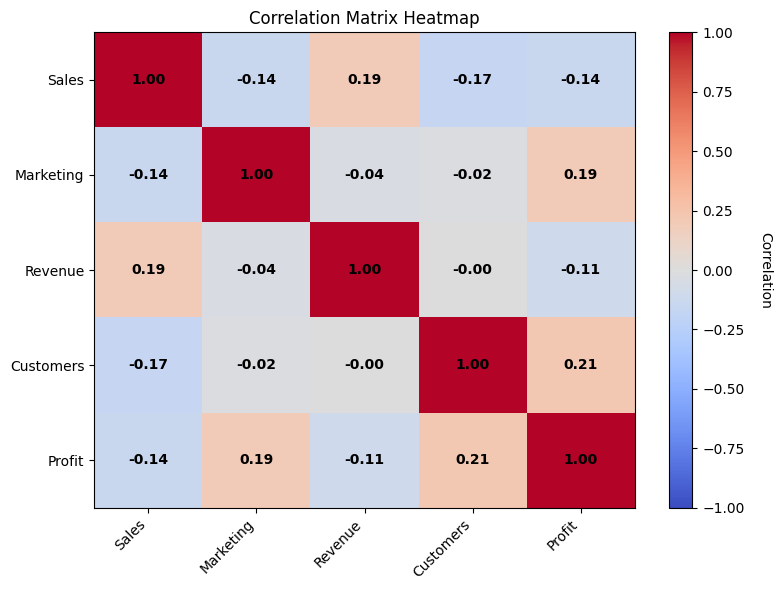

In [5]:
# Create correlation matrix from sample data
np.random.seed(42)
data = pd.DataFrame({
    'Sales': np.random.randn(100),
    'Marketing': np.random.randn(100),
    'Revenue': np.random.randn(100),
    'Customers': np.random.randn(100),
    'Profit': np.random.randn(100)
})

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Set ticks and labels
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation', rotation=270, labelpad=20)

# Add text annotations
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontweight='bold')

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


## Pie Chart

**Pie charts** show proportions of a whole. Use them for:
- Categorical distributions
- Percentage breakdowns
- Composition analysis

**When to Use Pie Charts:**
- Small number of categories (3-7)
- Showing proportions/percentages
- Comparing parts to whole

**When NOT to Use:**
- Too many categories (becomes cluttered)
- Need precise comparisons (bar charts are better)


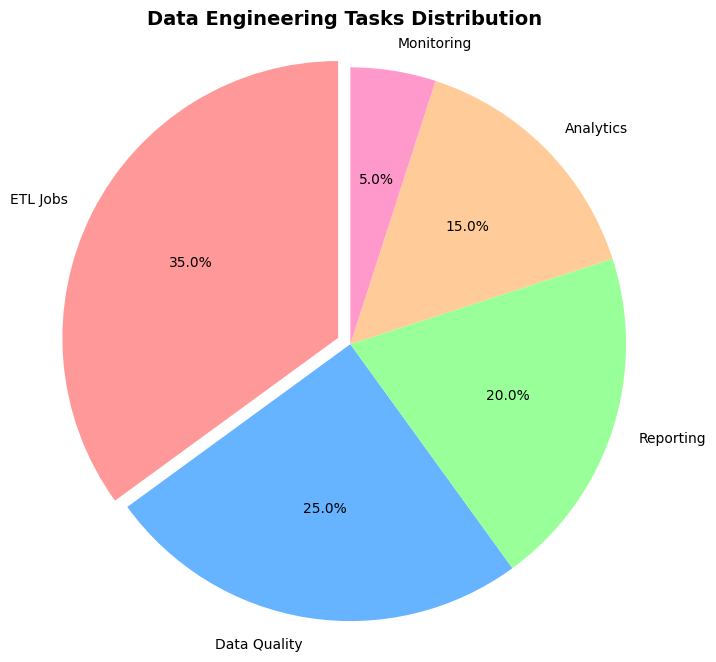

In [6]:
# Sample data
categories = ['ETL Jobs', 'Data Quality', 'Reporting', 'Analytics', 'Monitoring']
values = [35, 25, 20, 15, 5]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', 
        startangle=90, explode=(0.05, 0, 0, 0, 0))  # explode first slice
plt.title('Data Engineering Tasks Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()


## Area Plot

**Area plots** (stacked area charts) show:
- Cumulative values over time
- Multiple series stacked on top of each other
- Trends and composition changes

**Why Area Plots for Data Engineering?**
- **Resource usage**: Show cumulative resource consumption over time
- **Data volume**: Visualize data growth across different sources
- **Pipeline metrics**: Show contribution of different components


/var/folders/qs/gl7f55l16vn33l0848mpksch0000gp/T/ipykernel_25341/2743395441.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2024-01-01', periods=12, freq='M')


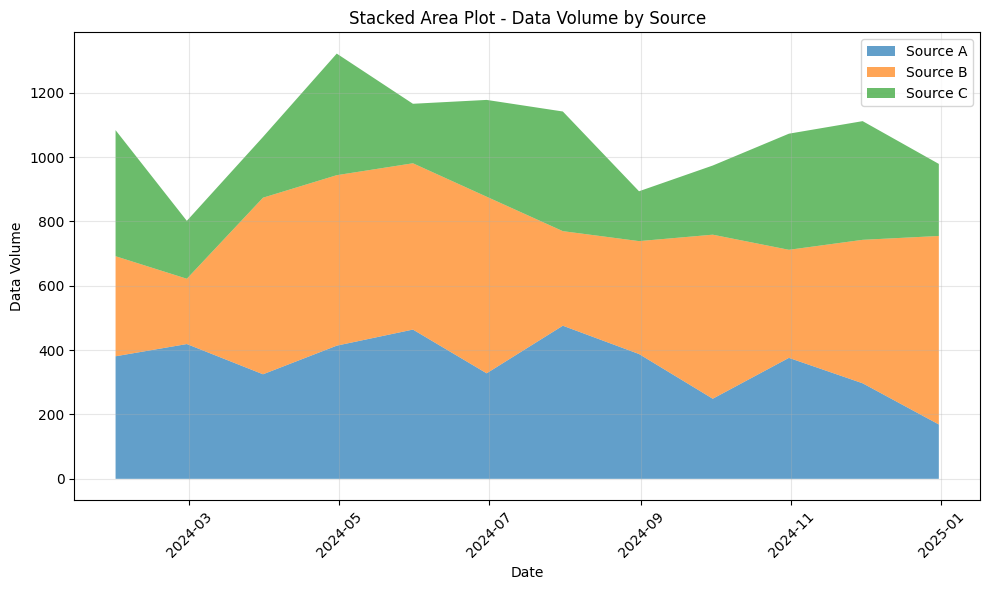

In [7]:
# Create time series data
dates = pd.date_range('2024-01-01', periods=12, freq='M')
df = pd.DataFrame({
    'Date': dates,
    'Source A': np.random.randint(100, 500, 12),
    'Source B': np.random.randint(200, 600, 12),
    'Source C': np.random.randint(150, 400, 12)
})

# Create stacked area plot
plt.figure(figsize=(10, 6))
plt.fill_between(df['Date'], 0, df['Source A'], label='Source A', alpha=0.7)
plt.fill_between(df['Date'], df['Source A'], df['Source A'] + df['Source B'], 
                 label='Source B', alpha=0.7)
plt.fill_between(df['Date'], df['Source A'] + df['Source B'], 
                 df['Source A'] + df['Source B'] + df['Source C'], 
                 label='Source C', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Data Volume')
plt.title('Stacked Area Plot - Data Volume by Source')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Stacked Bar Chart

**Stacked bar charts** compare totals across categories while showing composition.

**Why Stacked Bar Charts?**
- Compare totals across categories
- Show composition within each category
- Identify trends in component contributions


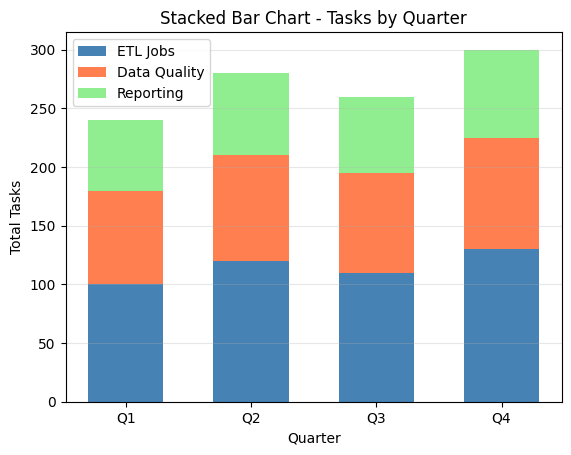

In [8]:
# Sample data
categories = ['Q1', 'Q2', 'Q3', 'Q4']
bottom = [100, 120, 110, 130]  # Bottom segment
middle = [80, 90, 85, 95]      # Middle segment
top = [60, 70, 65, 75]         # Top segment

# Create stacked bar chart
x = np.arange(len(categories))
width = 0.6

plt.bar(x, bottom, width, label='ETL Jobs', color='steelblue')
plt.bar(x, middle, width, bottom=bottom, label='Data Quality', color='coral')
plt.bar(x, top, width, bottom=[bottom[i] + middle[i] for i in range(len(categories))], 
        label='Reporting', color='lightgreen')

plt.xlabel('Quarter')
plt.ylabel('Total Tasks')
plt.title('Stacked Bar Chart - Tasks by Quarter')
plt.xticks(x, categories)
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.show()


## Real-World Example: Data Quality Dashboard

Let's create a comprehensive visualization showing different aspects of data quality using multiple plot types.


/var/folders/qs/gl7f55l16vn33l0848mpksch0000gp/T/ipykernel_25341/704795424.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0, 0].boxplot(data_for_box, labels=sources)


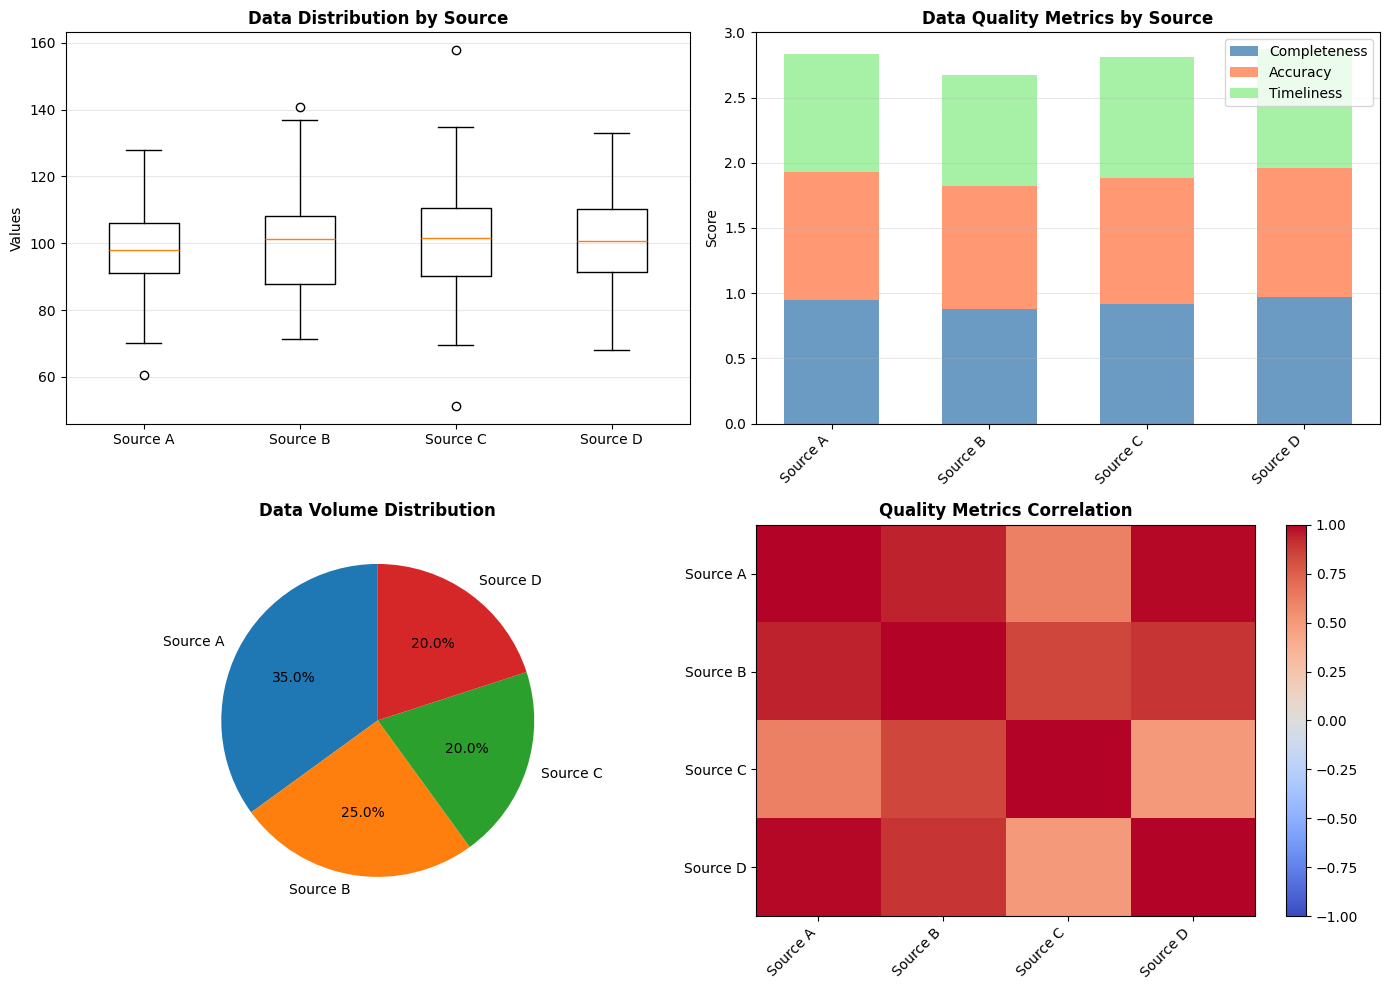

In [9]:
# Simulate data quality metrics
np.random.seed(42)
sources = ['Source A', 'Source B', 'Source C', 'Source D']
completeness = [0.95, 0.88, 0.92, 0.97]
accuracy = [0.98, 0.94, 0.96, 0.99]
timeliness = [0.90, 0.85, 0.93, 0.91]

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Box plot - Data distribution across sources
data_for_box = [np.random.normal(100, 15, 100) for _ in sources]
axes[0, 0].boxplot(data_for_box, labels=sources)
axes[0, 0].set_title('Data Distribution by Source', fontweight='bold')
axes[0, 0].set_ylabel('Values')
axes[0, 0].grid(True, axis='y', alpha=0.3)

# 2. Stacked bar chart - Data quality metrics
x = np.arange(len(sources))
width = 0.6
axes[0, 1].bar(x, completeness, width, label='Completeness', color='steelblue', alpha=0.8)
axes[0, 1].bar(x, accuracy, width, bottom=completeness, label='Accuracy', color='coral', alpha=0.8)
axes[0, 1].bar(x, timeliness, width, 
               bottom=[completeness[i] + accuracy[i] for i in range(len(sources))], 
               label='Timeliness', color='lightgreen', alpha=0.8)
axes[0, 1].set_title('Data Quality Metrics by Source', fontweight='bold')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(sources, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, axis='y', alpha=0.3)
axes[0, 1].set_ylim([0, 3])

# 3. Pie chart - Data volume distribution
volume = [35, 25, 20, 20]
axes[1, 0].pie(volume, labels=sources, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Data Volume Distribution', fontweight='bold')

# 4. Heatmap - Correlation between quality metrics
quality_df = pd.DataFrame({
    'Completeness': completeness,
    'Accuracy': accuracy,
    'Timeliness': timeliness
}, index=sources)
corr = quality_df.T.corr()
im = axes[1, 1].imshow(corr, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 1].set_xticks(range(len(sources)))
axes[1, 1].set_yticks(range(len(sources)))
axes[1, 1].set_xticklabels(sources, rotation=45, ha='right')
axes[1, 1].set_yticklabels(sources)
axes[1, 1].set_title('Quality Metrics Correlation', fontweight='bold')
plt.colorbar(im, ax=axes[1, 1])

plt.tight_layout()
plt.show()


## Summary

In this notebook, you learned:

1. **Box plots**: For understanding distributions, quartiles, and outliers
2. **Violin plots**: For detailed distribution shape visualization
3. **Heatmaps**: For correlation matrices and 2D data visualization
4. **Pie charts**: For showing proportions and categorical breakdowns
5. **Area plots**: For cumulative values and stacked time series
6. **Stacked bar charts**: For comparing totals with composition

**Key Takeaways:**
- Choose the right plot type for your data and question
- Box plots are excellent for data quality checks and outlier detection
- Heatmaps are perfect for correlation analysis
- Stacked charts show both totals and composition
- Combine multiple plot types for comprehensive data analysis

**Next Steps**: In the next notebook, we'll explore time series visualization, which is crucial for monitoring data pipelines and trends.
